In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.width', None)
df_social_data = pd.read_excel('social_data.xlsx')

In [4]:
df_social_data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0.0,0.0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517.0,1215.0,Video


In [5]:
df_social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   float64       
 5   Total Engagements  3479 non-null   float64       
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 190.4+ KB


In [79]:
# drop nulls and duplicates
df_social_data = df_social_data.dropna()
df_social_data = df_social_data.drop_duplicates()

In [80]:
# 1. What is the typical engagement rate we can expect? What’s the likelihood that we can 
# achieve a 15% engagement rate?

# engagement rate = (total engagements/total impressions) * 100

tot_impressions = df_social_data['Total Impressions'].sum()
tot_engagements = df_social_data['Total Engagements'].sum()
engagement_rate = round((tot_engagements/tot_impressions)* 100, 2)
engagement_rate

8.52

In [81]:
# the typical engagement rate we can expect from this data is 8.63%.
# With the current engagement rate, it would be difficult to achieve 
# an engagement rate of 15% considering we are a little under 7% away. 

2.Does day of the week and time of posting affect engagement rates?

In [82]:
# first convert Published Date column into a datetime object
df_social_data['Published Date'] = pd.to_datetime(df_social_data['Published Date'])

# create new columns that extract the day and month from the published date
df_social_data['Day of Week'] = df_social_data['Published Date'].dt.day_name()
df_social_data['Hour of Day'] = df_social_data['Published Date'].dt.hour

In [83]:
df_social_data.head(3)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Day of Week,Hour of Day
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0.0,0.0,Text,Friday,19
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0.0,0.0,Text,Friday,19
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0.0,0.0,Text,Friday,19


In [84]:
# calculate the average engagement rate for each day of the week
avg_engagement_by_day = df_social_data.groupby('Day of Week')[['Total Engagements', 'Total Impressions']].sum()
avg_engagement_by_day['Engagement Rate'] = (avg_engagement_by_day['Total Engagements'] / avg_engagement_by_day['Total Impressions']) * 100

In [85]:
avg_engagement_by_hour = df_social_data.groupby('Hour of Day')[['Total Engagements', 'Total Impressions']].sum()
avg_engagement_by_hour['Engagement Rate'] = (avg_engagement_by_hour['Total Engagements'] / avg_engagement_by_hour['Total Impressions']) * 100

In [86]:
avg_engagement_by_day

,Total Engagements,Total Impressions,Engagement Rate
Day of Week,,,
Friday,622439.0,7364062.0,8.452387
Monday,166246.0,2474436.0,6.718541
Saturday,146694.0,3028493.0,4.843795
Sunday,389211.0,3692097.0,10.541733
Thursday,755371.0,8444600.0,8.945018
Tuesday,692948.0,7075920.0,9.793045
Wednesday,448345.0,5725162.0,7.831132


In [87]:
avg_engagement_by_hour

,Total Engagements,Total Impressions,Engagement Rate
Hour of Day,,,
0,0.0,0.0,NaN
2,274.0,32613.0,0.840156
3,5114.0,66113.0,7.735241
4,4135.0,46270.0,8.936676
5,73724.0,313430.0,23.521679
6,56478.0,712433.0,7.927482
7,151909.0,1057811.0,14.360694
8,192957.0,1878286.0,10.273036
9,449715.0,5203680.0,8.642249


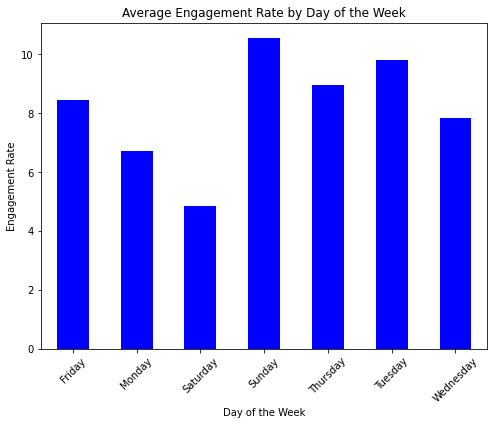

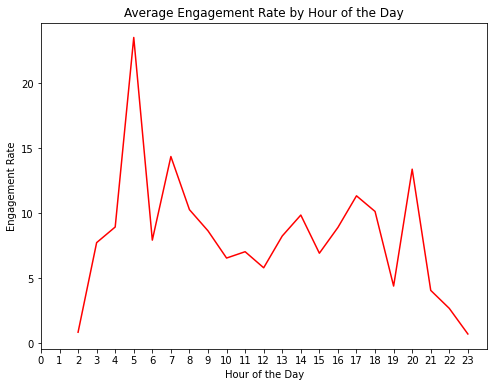

In [88]:
# plot average engagement rates by day of the week
# Plotting average engagement rates by day of the week
plt.figure(figsize=(8, 6))
avg_engagement_by_day['Engagement Rate'].plot(kind='bar', color='blue')
plt.title('Average Engagement Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.show()

# Plotting average engagement rates by hour of the day
plt.figure(figsize=(8, 6))
avg_engagement_by_hour['Engagement Rate'].plot(kind='line', color='red')
plt.title('Average Engagement Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Engagement Rate')
plt.xticks(range(24))
plt.show()

In [30]:
# it does seem like day and time of posting affect the engagement rates
# the highest engagement was seen on Sundays and Tuesdays and extremely high
# when posted at 5:00 in the morning.  Assuming the times are in pacific time
# this would mean 8 am on the east coast which could explain the high engagement


3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

4. What media type performs the best?

In [90]:
df_social_data = df_social_data[df_social_data['Media Type'] != 'Album']
media_type = df_social_data.groupby(['Media Type'])[['Total Engagements', 'Total Impressions']].sum()
media_type

,Total Engagements,Total Impressions
Media Type,,
Carousel,6541.0,160689.0
Link,2063.0,224713.0
Mixed,13664.0,184984.0
Photo,2093338.0,23542925.0
Text,246268.0,3099560.0
Video,859380.0,10591899.0


In [91]:
media_type['Engagement Rate'] =(media_type['Total Engagements']/media_type['Total Impressions'])*100
media_type

,Total Engagements,Total Impressions,Engagement Rate
Media Type,,,
Carousel,6541.0,160689.0,4.070596
Link,2063.0,224713.0,0.918060
Mixed,13664.0,184984.0,7.386585
Photo,2093338.0,23542925.0,8.891580
Text,246268.0,3099560.0,7.945257
Video,859380.0,10591899.0,8.113559


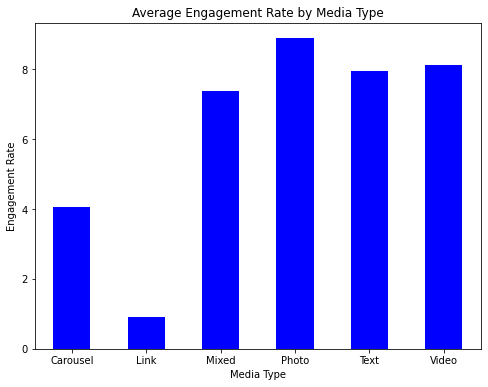

In [92]:
# Plotting the average engagement rate for each media type
plt.figure(figsize=(8, 6))
media_type['Engagement Rate'].plot(kind='bar', color='blue')
plt.title('Average Engagement Rate by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=0)
plt.show()

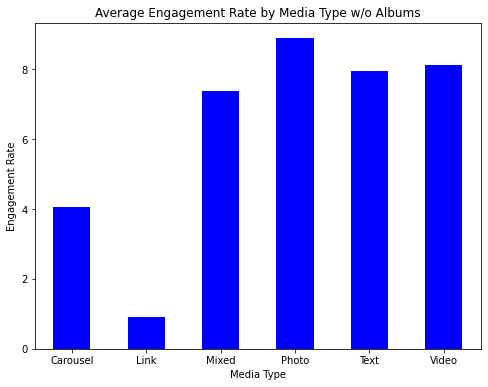

In [93]:
# from this bar graph we can see that Album had the best performance.
# however looking at the table we can see that Albums only had 20 impressions
# while the other media types had impressions on the thousands
# the sample size for album is too small to have any impactful insights so we
# drop albums from the media type

# Plotting the average engagement rate for each media type without album
plt.figure(figsize=(8, 6))
media_type['Engagement Rate'].plot(kind='bar', color='blue')
plt.title('Average Engagement Rate by Media Type w/o Albums')
plt.xlabel('Media Type')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=0)
plt.show()

In [94]:
# from this new graph we can see that Photos were the best performing
# media type

5. What is our best performing campaign?

In [99]:
# this a very similar approach to the media type
df_social_data = df_social_data[df_social_data['Campaign Name'] != 'N/A']
campaign_type = df_social_data.groupby(['Campaign Name'])[['Total Engagements', 'Total Impressions']].sum()
campaign_type

,Total Engagements,Total Impressions
Campaign Name,,
Community Engagement,1973294.0,23517430.0
Evergreen,43127.0,1328729.0
Evil Exhibited,184830.0,5716495.0
N/A,1020003.0,7242116.0


In [100]:
campaign_type['Engagement Rate'] =(campaign_type['Total Engagements']/campaign_type['Total Impressions'])*100
campaign_type

,Total Engagements,Total Impressions,Engagement Rate
Campaign Name,,,
Community Engagement,1973294.0,23517430.0,8.390772
Evergreen,43127.0,1328729.0,3.245733
Evil Exhibited,184830.0,5716495.0,3.233275
N/A,1020003.0,7242116.0,14.084323


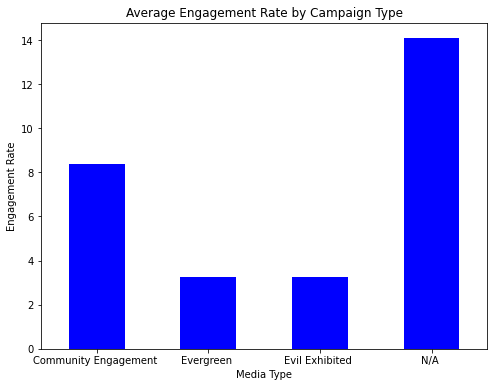

In [101]:
# Plotting the average engagement rate for each campaign type
plt.figure(figsize=(8, 6))
campaign_type['Engagement Rate'].plot(kind='bar', color='blue')
plt.title('Average Engagement Rate by Campaign Type')
plt.xlabel('Media Type')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=0)
plt.show()

In [102]:
# as we can see from the graph (ignoring the N/A column)
# we can see that community engagement yielded the highest performance